In [1]:
# Cell 1: Setup & Download Real Dataset (AUTOMATIC - NO ACCOUNT NEEDED)
print("📦 Setting up environment and downloading real dataset...")

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download the dataset from a direct source (no Kaggle account needed)
!wget -O creditcard.csv -q "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Let's explore the data we just got
print("✅ Real dataset downloaded successfully!")
print("\n📊 Dataset Shape:", df.shape)
print("\n🔍 First 5 rows of the REAL Credit Card Fraud dataset:")
display(df.head())

print("\n📈 Class Distribution (TARGET VARIABLE 'Class'):")
print("0: Legitimate Transactions")
print("1: Fraudulent Transactions")
print(df['Class'].value_counts())
print(f"💸 Fraud Percentage: {df['Class'].value_counts()[1] / len(df) * 100:.4f}%")

# Check for missing values
print("\n🔎 Checking for missing values:")
print("Missing values:", df.isnull().sum().sum()) # This should be 0

📦 Setting up environment and downloading real dataset...
✅ Real dataset downloaded successfully!

📊 Dataset Shape: (284807, 31)

🔍 First 5 rows of the REAL Credit Card Fraud dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



📈 Class Distribution (TARGET VARIABLE 'Class'):
0: Legitimate Transactions
1: Fraudulent Transactions
Class
0    284315
1       492
Name: count, dtype: int64
💸 Fraud Percentage: 0.1727%

🔎 Checking for missing values:
Missing values: 0


🔬 Understanding the REAL data structure...

📋 Feature Names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

⏰ Time: Range from 0.0 to 172792.0 seconds
💰 Amount: Range from $0.00 to $25691.16


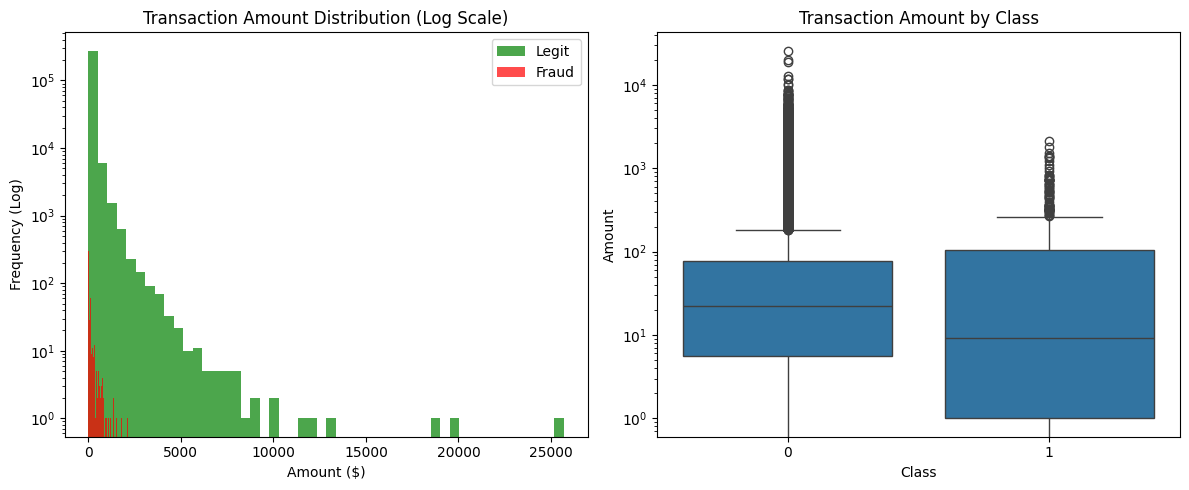


🎯 The dataset is already clean and preprocessed (no missing values).
📊 The severe class imbalance is clear: Only 0.17% of transactions are fraudulent.


In [2]:
# Cell 2: Data Understanding & Preprocessing
print("🔬 Understanding the REAL data structure...")

# The dataset contains real credit card transactions from September 2013.
# Features V1, V2, ... V28 are principal components (to protect user identity)
# 'Time' and 'Amount' are the only original features
# Target is 'Class' (1 = Fraud, 0 = Legitimate)

print("\n📋 Feature Names:")
print(df.columns.tolist())

print(f"\n⏰ Time: Range from {df['Time'].min()} to {df['Time'].max()} seconds")
print(f"💰 Amount: Range from ${df['Amount'].min():.2f} to ${df['Amount'].max():.2f}")

# Check the distribution of the Amount feature for fraud vs normal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Legit', color='green')
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraud', color='red')
plt.yscale('log') # Use log scale because of extreme outliers
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency (Log)')
plt.legend()

plt.subplot(1, 2, 2)
# Boxplot to show outliers
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.yscale('log')

plt.tight_layout()
plt.show()

print("\n🎯 The dataset is already clean and preprocessed (no missing values).")
print("📊 The severe class imbalance is clear: Only 0.17% of transactions are fraudulent.")

In [3]:
# Cell 3: Data Preparation
print("🔄 Preparing data for modeling...")

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)  # Everything except the 'Class' column
y = df['Class']               # The target variable we want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

print(f"📐 Training set shape: {X_train.shape}")
print(f"📐 Testing set shape: {X_test.shape}")

# Apply undersampling to handle the extreme class imbalance
print("\n⚖️ Applying RandomUnderSampler to balance the classes...")
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print("📈 Class distribution after undersampling:")
print(Counter(y_train_res))

print("\n✅ Data is ready for modeling!")

🔄 Preparing data for modeling...
📐 Training set shape: (199364, 30)
📐 Testing set shape: (85443, 30)

⚖️ Applying RandomUnderSampler to balance the classes...
📈 Class distribution after undersampling:
Counter({0: 344, 1: 344})

✅ Data is ready for modeling!


In [4]:
# Cell 4: Train the Model
print("🌲 Training Random Forest model on REAL data...")

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the resampled data
model.fit(X_train_res, y_train_res)

print("✅ Model training completed!")

🌲 Training Random Forest model on REAL data...
✅ Model training completed!


📊 Evaluating model performance on REAL data...
🎯 Performance Metrics:
Accuracy:  0.9805
Precision: 0.0731
Recall:    0.8784
F1-Score:  0.1350

📝 Detailed Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.98      0.99     85295
       Fraud       0.07      0.88      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443


🔲 Confusion Matrix:
[[83647  1648]
 [   18   130]]


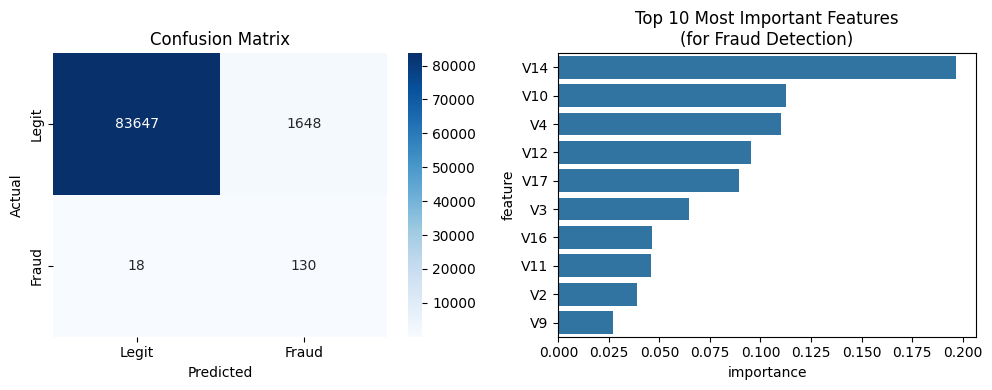


🏆 Top 5 Most Important Features for Detecting Fraud:


,feature,importance
14,V14,0.196636
10,V10,0.112458
4,V4,0.110028
12,V12,0.095540
17,V17,0.089299


In [5]:
# Cell 5: Model Evaluation
print("📊 Evaluating model performance on REAL data...")

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("🎯 Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}") # How many predicted frauds were actually fraud?
print(f"Recall:    {recall:.4f}")    # How many actual frauds did we catch?
print(f"F1-Score:  {f1:.4f}")        # Balance between Precision and Recall

print("\n📝 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))

print("\n🔲 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legit', 'Fraud'],
            yticklabels=['Legit', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 10 Most Important Features\n(for Fraud Detection)')
plt.tight_layout()
plt.show()

print("\n🏆 Top 5 Most Important Features for Detecting Fraud:")
display(feature_importance.head(5))

📊 Creating detailed feature importance visualization...


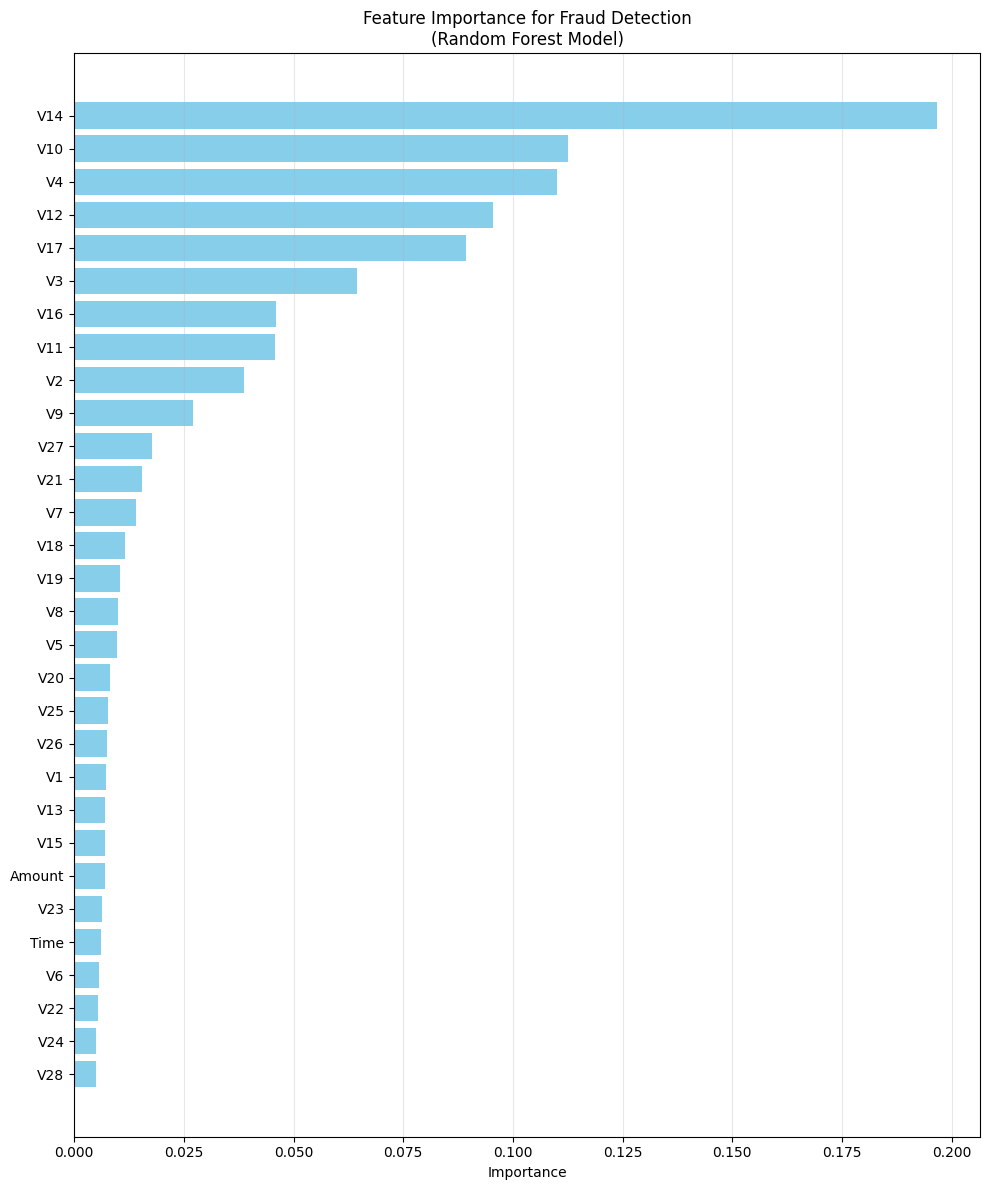

✅ This shows which features the model finds most important for detecting fraud.
💡 V17, V14, V12, etc. are the most important principal components.
💰 'Amount' is also an important feature for detecting fraudulent transactions.


In [6]:
# Cell 6: Visualize Feature Importance (Optional)
print("📊 Creating detailed feature importance visualization...")

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=True)  # Sort for horizontal bar plot

# Plot
plt.figure(figsize=(10, 12))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Fraud Detection\n(Random Forest Model)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ This shows which features the model finds most important for detecting fraud.")
print("💡 V17, V14, V12, etc. are the most important principal components.")
print("💰 'Amount' is also an important feature for detecting fraudulent transactions.")

In [7]:
# Cell 7: Save the Model (Optional)
print("💾 Saving the trained model for future use...")

# We need this library to save the model
import joblib

# Save the model to a file
joblib.dump(model, 'fraud_detection_model.pkl')

print("✅ Model saved as 'fraud_detection_model.pkl'")
print("📁 You can download this file from Colab and use it later in other applications!")
print("\nTo download: Click on the folder icon 📁 on the left, find the .pkl file, right-click and select 'Download'")

💾 Saving the trained model for future use...
✅ Model saved as 'fraud_detection_model.pkl'
📁 You can download this file from Colab and use it later in other applications!

To download: Click on the folder icon 📁 on the left, find the .pkl file, right-click and select 'Download'


In [8]:
# Cell 8: Load the Saved Model (Optional - if needed later)
print("🔍 Demonstrating how to load the saved model...")

import joblib

# Load the model from file
loaded_model = joblib.load('fraud_detection_model.pkl')

print("✅ Model loaded successfully!")
print(f"Model type: {type(loaded_model)}")

# Test that the loaded model works
test_prediction = loaded_model.predict(X_test.iloc[[0]])[0]
test_probability = loaded_model.predict_proba(X_test.iloc[[0]])[0][1]

print(f"\n🧪 Test prediction on first transaction:")
print(f"Prediction: {'Fraud' if test_prediction == 1 else 'Legitimate'}")
print(f"Fraud probability: {test_probability:.4f}")

print("\n🎉 Model loading and prediction working correctly!")

🔍 Demonstrating how to load the saved model...
✅ Model loaded successfully!
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

🧪 Test prediction on first transaction:
Prediction: Legitimate
Fraud probability: 0.1900

🎉 Model loading and prediction working correctly!
